In [183]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sys.path.append(str(Path.cwd().resolve().parent / "src"))

from project_setup import get_project_root, make_paths, new_run_dir, save_data
from plotting import savefig

root = get_project_root()
paths = make_paths(root)
run_dir = new_run_dir(paths, label="week_2")

print(f"Project root: {paths.root}")
print(f"Run directory: {run_dir}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project root: /Users/david/Code/msc
Run directory: /Users/david/Code/msc/outputs/runs/week_2


In [184]:
df = pd.read_csv(paths.data_external / "week2/ZTF18aaxhcam_difference_photometry.csv")

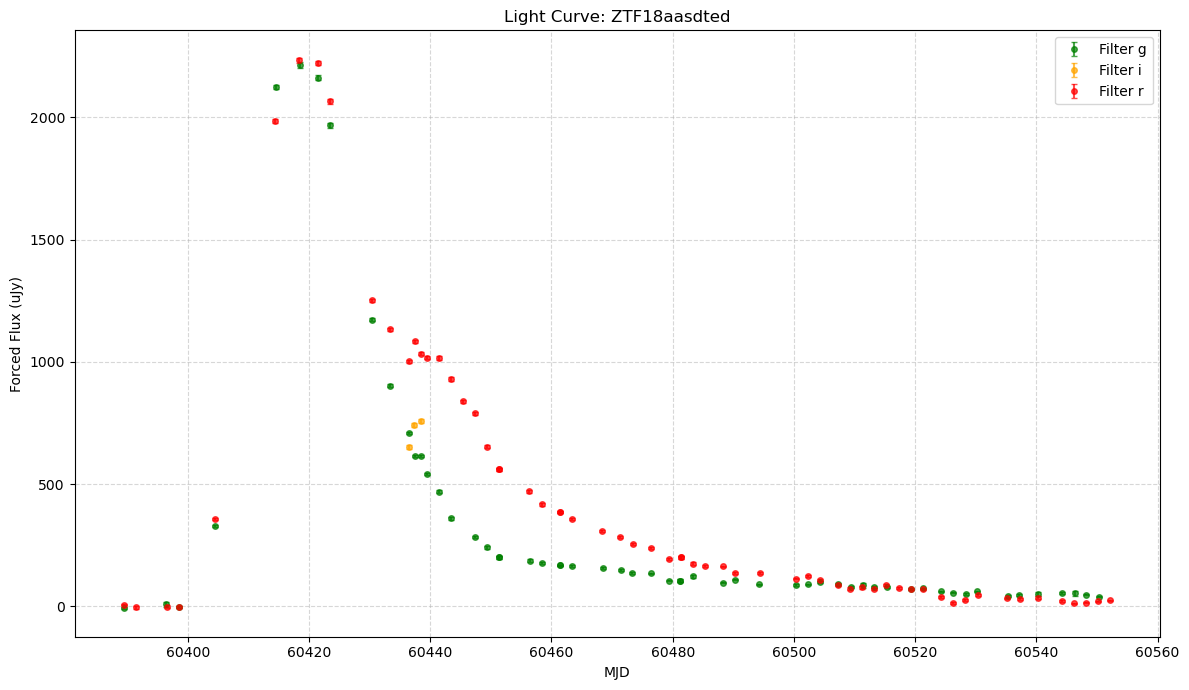

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/2026-01-23_light_curve_ZTF18aasdted.png')

In [186]:
df['MJD'] = pd.to_numeric(df['MJD'], errors='coerce')
df['forced_ujy'] = pd.to_numeric(df['forced_ujy'], errors='coerce')
df['forced_ujy_error'] = pd.to_numeric(df['forced_ujy_error'], errors='coerce')

df_plot = df.dropna(subset=['MJD', 'forced_ujy', 'filter'])
df_plot = df_plot.sort_values(by='MJD')

filter_colors = {'g': 'green', 'r': 'red', 'i': 'orange'}
fig = plt.figure(figsize=(12, 7))

for filt, group in df_plot.groupby('filter'):
    plt.errorbar(
        group['MJD'], 
        group['forced_ujy'], 
        yerr=group['forced_ujy_error'], 
        fmt='o', 
        label=f'Filter {filt}', 
        color=filter_colors.get(filt, 'blue'), 
        alpha=0.7,
        markersize=4,
        capsize=2
    )
plt.xlabel('MJD')
plt.ylabel('Forced Flux (uJy)')
plt.title('Light Curve: ZTF18aasdted')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

savefig(fig, run_dir, "light_curve_ZTF18aasdted")